<a href="https://colab.research.google.com/github/IvanSalinas2000/Preprocesamiento-y-clasificacion-de-datos/blob/main/Tarea2/Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea 2

Iván Gabriel Salinas Castillo

Procesamiento y clasificacion de datos


In [1]:
!pip install gutenbergpy

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 11.2 MB/s eta 0:00:00
  Created wheel for httpsproxy-urllib2: filename=httpsproxy_urllib2-1.0-py3-none-any.whl size=29250 sha256=66cdf47f4cba1eb04a24aa699086410048d594719d9b653dc6c77ff71d58b9a4
  Stored in directory: /root/.cache/pip/wheels/e6/5c/6b/790df3d7037e3d9aaf7a48d563626941f2f60198d2f1eef8d2
Successfully built httpsproxy-urllib2


In [11]:
!pip install textblob

In [37]:
!pip install transformers

In [38]:
import gutenbergpy.textget
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from collections import Counter
from nltk.util import ngrams
import matplotlib.pyplot as plt
from gutenbergpy.textget import get_text_by_id, strip_headers
import seaborn as sns
from transformers import pipeline, AutoTokenizer, AutoModel
import torch

# Descargar recursos necesarios
sns.set_style("whitegrid")
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [39]:
# Configuración inicial
stop_words = set(stopwords.words('spanish'))
stop_words.update(['a', 'si', 'tan', 'así', 'sancho', 'quijote', 'don'])

nombres_ignorados_dq = {"don", "quijote", "sancho", "dulcinea"}
nombres_ignorados_odisea = {"ulises", "penélope", "telémaco", "calipso"}

In [40]:
# Funciones auxiliares

def obtener_libro(id):
    raw_book = gutenbergpy.textget.get_text_by_id(id)
    clean_book = gutenbergpy.textget.strip_headers(raw_book)
    return clean_book.decode()

def limpiar_texto(texto, stop_words, nombres_ignorados):
    palabras = word_tokenize(texto.lower())
    palabras = [p for p in palabras if p.isalpha() and p not in stop_words and p not in nombres_ignorados]
    return palabras

def calcular_frecuencia_ngramas(palabras, n):
    n_grams = ngrams(palabras, n)
    return Counter(n_grams)

def graficar_frecuencias(frecuencia, titulo, num_items=10):
    items, conteos = zip(*frecuencia.most_common(num_items))
    etiquetas = [' '.join(item) if isinstance(item, tuple) else item for item in items]
    plt.figure(figsize=(10, 6))
    plt.barh(etiquetas, conteos, color='skyblue')
    plt.xlabel('Frecuencia')
    plt.title(titulo)
    plt.gca().invert_yaxis()
    plt.show()

def analizar_sentimientos_por_personajes(texto, personajes):
    sentimientos = {}
    for personaje in personajes:
        oraciones_personaje = [oracion for oracion in nltk.sent_tokenize(texto) if personaje.lower() in oracion.lower()]
        blob = TextBlob(' '.join(oraciones_personaje))
        polaridad = blob.sentiment.polarity
        sentimientos[personaje] = "Positivo" if polaridad > 0 else "Negativo" if polaridad < 0 else "Neutral"
    return sentimientos

def analizar_signos_puntuacion(texto):
    signos = Counter(char for char in texto if char in re.escape(r'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'))
    return signos

def estadisticas_descriptivas(texto):
    palabras = word_tokenize(texto)
    total_palabras = len(palabras)
    total_oraciones = len(nltk.sent_tokenize(texto))
    longitud_promedio_palabra = sum(len(palabra) for palabra in palabras if palabra.isalpha()) / total_palabras
    return {
        "Total de palabras": total_palabras,
        "Total de oraciones": total_oraciones,
        "Longitud promedio de palabra": longitud_promedio_palabra
    }

def calcular_polaridad_total(texto):
    blob = TextBlob(texto)
    return blob.sentiment.polarity

# Modelo de BERT para vectorización
model_name = "sentence-transformers/all-MiniLM-L6-v2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

def vectorizar_texto_bert(texto):
    inputs = tokenizer(texto, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1)
    return embeddings.squeeze().numpy()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

#Don Quijote

Estadísticas descriptivas de 'Don Quijote': {'Total de palabras': 444430, 'Total de oraciones': 9513, 'Longitud promedio de palabra': 3.6436739194023806}
Palabras más comunes en 'Don Quijote': [('señor', 1064), ('ser', 1059), ('bien', 1042), ('dijo', 933), ('merced', 900), ('pues', 856), ('sino', 694), ('dos', 684), ('caballero', 665), ('decir', 578)]


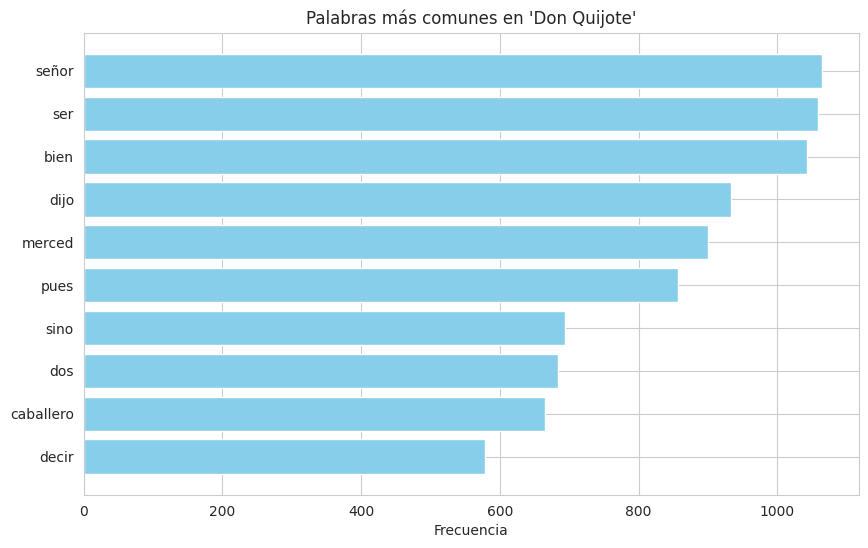

In [41]:
# Análisis de "Don Quijote"
don_quijote = obtener_libro(2000)
print("Estadísticas descriptivas de 'Don Quijote':", estadisticas_descriptivas(don_quijote))

palabras_dq = limpiar_texto(don_quijote, stop_words, nombres_ignorados_dq)
frecuencia_dq = Counter(palabras_dq)

print("Palabras más comunes en 'Don Quijote':", frecuencia_dq.most_common(10))
graficar_frecuencias(frecuencia_dq, "Palabras más comunes en 'Don Quijote'")

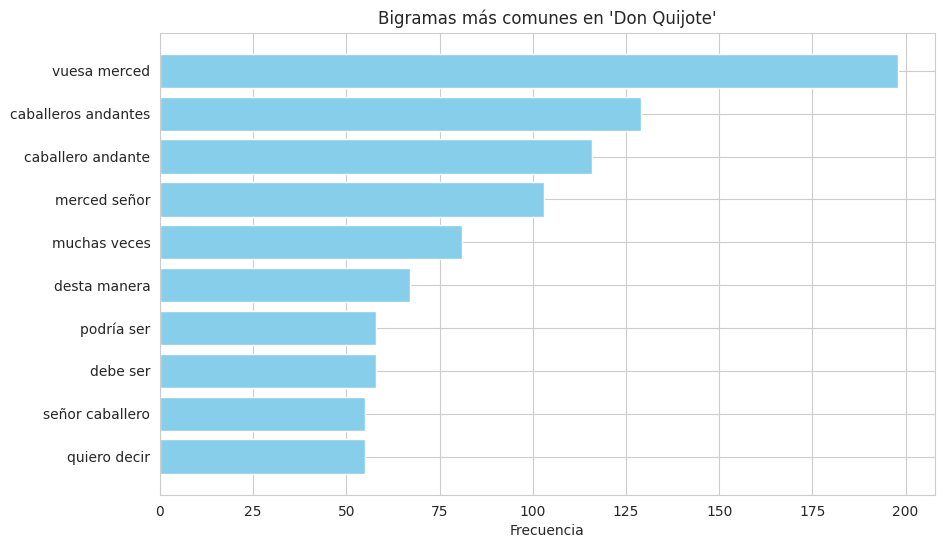

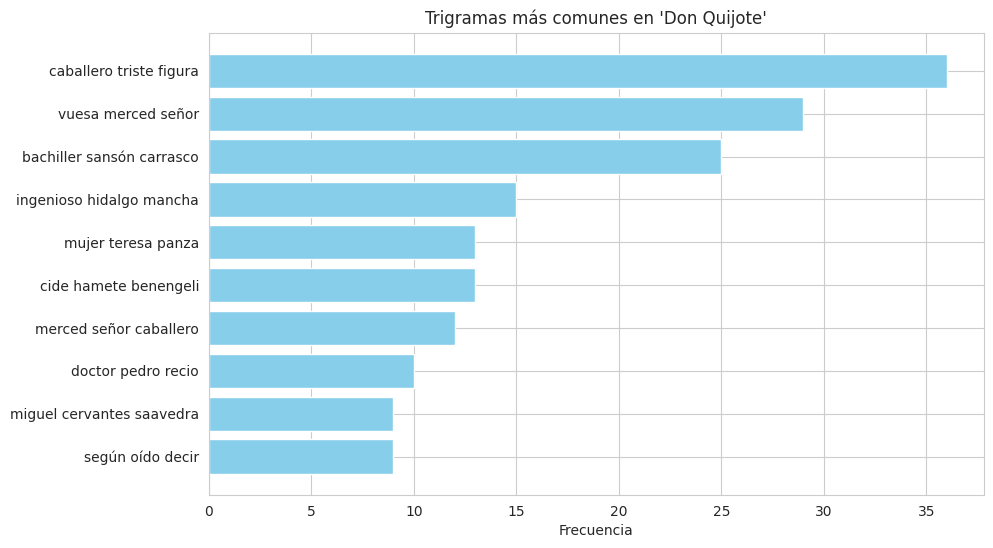

In [42]:
# N-gramas y gráficos
bigramas_dq = calcular_frecuencia_ngramas(palabras_dq, 2)
trigramas_dq = calcular_frecuencia_ngramas(palabras_dq, 3)
graficar_frecuencias(bigramas_dq, "Bigramas más comunes en 'Don Quijote'")
graficar_frecuencias(trigramas_dq, "Trigramas más comunes en 'Don Quijote'")

In [43]:
# Sentimientos
personajes_dq = ["Don Quijote", "Sancho", "Dulcinea"]
sentimientos_dq = analizar_sentimientos_por_personajes(don_quijote, personajes_dq)
print("Análisis de sentimientos para personajes de 'Don Quijote':", sentimientos_dq)

Análisis de sentimientos para personajes de 'Don Quijote': {'Don Quijote': 'Positivo', 'Sancho': 'Positivo', 'Dulcinea': 'Positivo'}


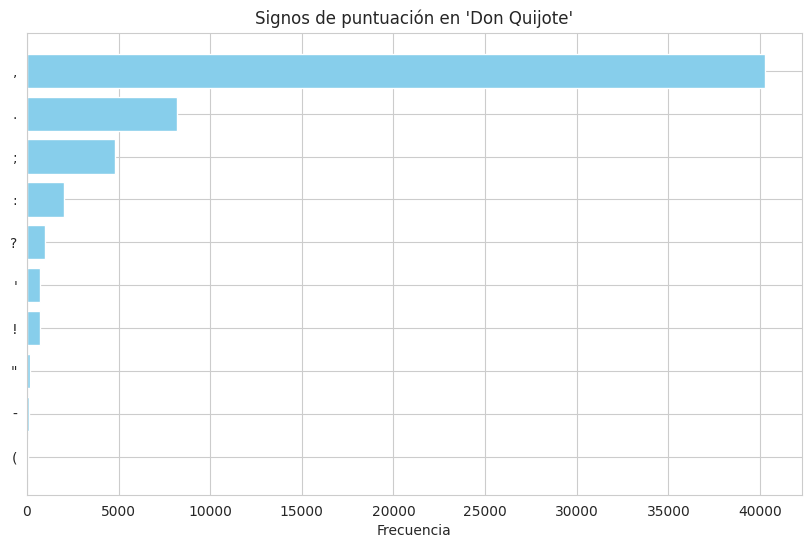

In [44]:
# Análisis de signos de puntuación
dq_signos = analizar_signos_puntuacion(don_quijote)
graficar_frecuencia(dq_signos, "Signos de puntuación en 'Don Quijote'")

In [45]:
# Análisis de vectorización con BERT para "Don Quijote"
dq_embedding = vectorizar_texto_bert(don_quijote)
print("Vectorización de 'Don Quijote' con BERT. Dimensión del vector:", dq_embedding.shape)

Vectorización de 'Don Quijote' con BERT. Dimensión del vector: (384,)


#La Odisea

Estadísticas descriptivas de 'La Odisea': {'Total de palabras': 196950, 'Total de oraciones': 4634, 'Longitud promedio de palabra': 3.6970500126935772}
Palabras más comunes en 'La Odisea': [('pues', 524), ('pretendientes', 501), ('júpiter', 481), ('hijo', 477), ('palacio', 400), ('ms', 395), ('casa', 375), ('minerva', 372), ('padre', 316), ('mas', 314)]


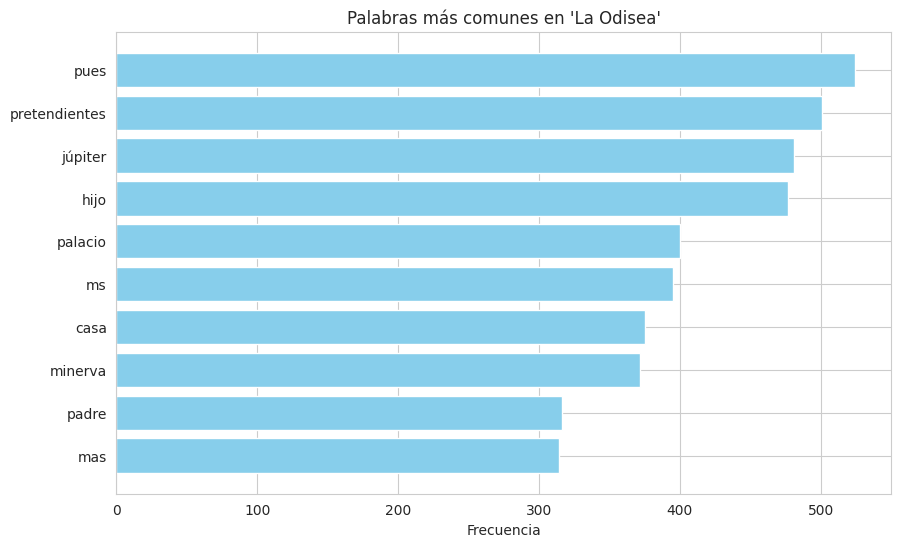

In [46]:
#Análisis de "La Odisea"
odisea = obtener_libro(58221)
odisea = odisea.replace('á', '')  # Remover la letra 'á'
print("Estadísticas descriptivas de 'La Odisea':", estadisticas_descriptivas(odisea))

palabras_odisea = limpiar_texto(odisea, stop_words, nombres_ignorados_odisea)
frecuencia_odisea = Counter(palabras_odisea)

print("Palabras más comunes en 'La Odisea':", frecuencia_odisea.most_common(10))
graficar_frecuencias(frecuencia_odisea, "Palabras más comunes en 'La Odisea'")


#N-gramas

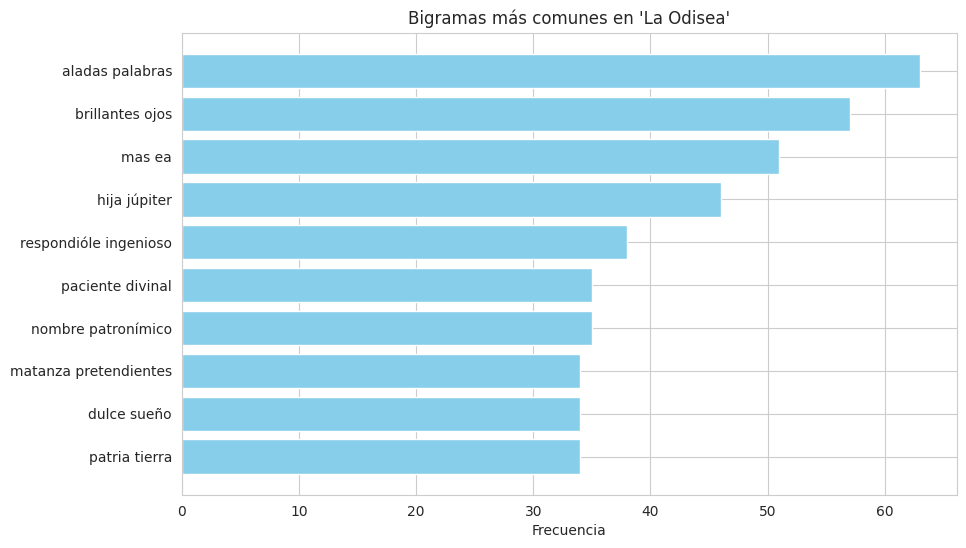

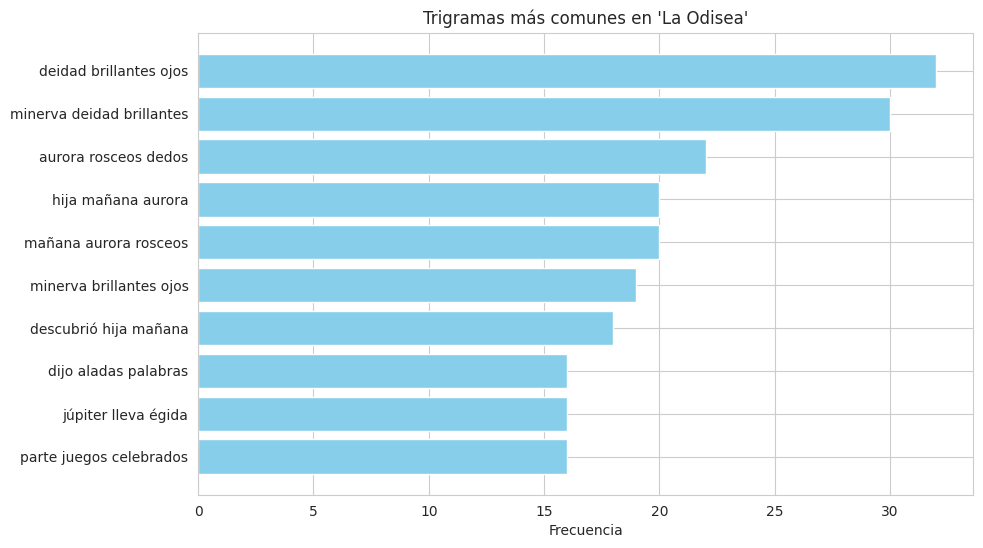

In [47]:
# N-gramas y gráficos
bigramas_odisea = calcular_frecuencia_ngramas(palabras_odisea, 2)
trigramas_odisea = calcular_frecuencia_ngramas(palabras_odisea, 3)
graficar_frecuencias(bigramas_odisea, "Bigramas más comunes en 'La Odisea'")
graficar_frecuencias(trigramas_odisea, "Trigramas más comunes en 'La Odisea'")

In [48]:
# Sentimientos
personajes_odisea = ["Ulises", "Penélope", "Telémaco"]
sentimientos_odisea = analizar_sentimientos_por_personajes(odisea, personajes_odisea)
print("Análisis de sentimientos para personajes de 'La Odisea':", sentimientos_odisea)

Análisis de sentimientos para personajes de 'La Odisea': {'Ulises': 'Negativo', 'Penélope': 'Negativo', 'Telémaco': 'Negativo'}


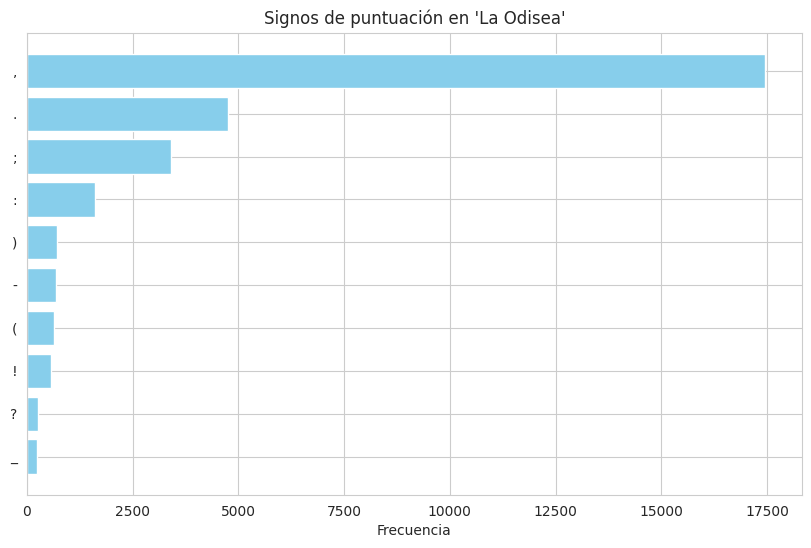

In [49]:
# Análisis de signos de puntuación
odisea_signos = analizar_signos_puntuacion(odisea)
graficar_frecuencias(odisea_signos, "Signos de puntuación en 'La Odisea'")

In [50]:
# Análisis de vectorización con BERT para "La Odisea"
odisea_embedding = vectorizar_texto_bert(odisea)
print("Vectorización de 'La Odisea' con BERT. Dimensión del vector:", odisea_embedding.shape)

Vectorización de 'La Odisea' con BERT. Dimensión del vector: (384,)


#Comparaciones

In [53]:
# Comparación de polaridades
dq_polaridad = calcular_polaridad_total(don_quijote)
od_polaridad = calcular_polaridad_total(odisea)
print(f"Polaridad promedio en 'Don Quijote': {dq_polaridad}")
print(f"Polaridad promedio en 'La Odisea': {od_polaridad}")

# Comparación con calificaciones externas
print("Se les suele atribuir los siguientes sentimientos por parte de lectores")
print("Don Quijote: aventura, caballerosidad, confusión, desilusión, comedia, ironía")
print("La Odisea: anhelo, nostalgia, coraje, determinación, pérdida, tristeza")

Polaridad promedio en 'Don Quijote': 0.00875050004706322
Polaridad promedio en 'La Odisea': -0.34406647013667396
Se les suele atribuir los siguientes sentimientos por parte de lectores
Don Quijote: aventura, caballerosidad, confusión, desilusión, comedia, ironía
La Odisea: anhelo, nostalgia, coraje, determinación, pérdida, tristeza
